In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # df processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Input df files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleanedfinalprocessing/cleanedFinal.csv


In [2]:
df = pd.read_csv('/kaggle/input/cleanedfinalprocessing/cleanedFinal.csv')
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,4,38542.0,7.82,10.73
3,5,48712.0,7.51,10.04
4,6,172333.0,14.16,35.06


# use elbow method to find the number of clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

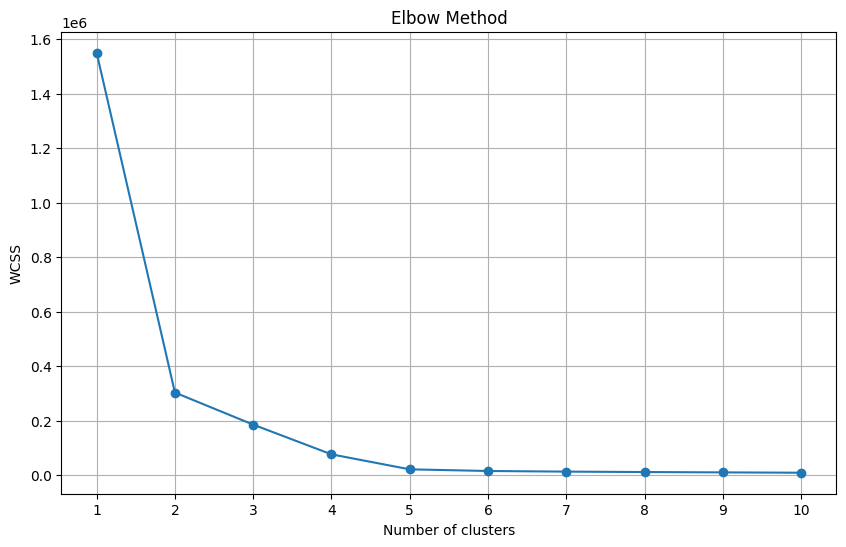

In [3]:
# Standardize the data
data = df[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Dimensionality reduction (optional)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Compute WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the Elbow Point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# K-means clustering

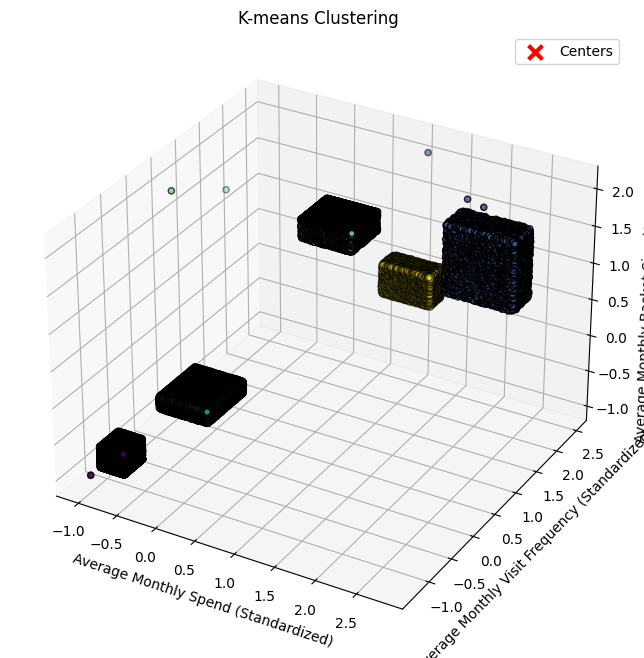

In [4]:
# Plotting the clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=5)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_centers = kmeans.cluster_centers_
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')

# Plot the cluster centers
ax.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], kmeans_centers[:, 2], c='red', marker='x', s=100, linewidths=3, label='Centers')

ax.set_title('K-means Clustering')
ax.set_xlabel('Average Monthly Spend (Standardized)')
ax.set_ylabel('Average Monthly Visit Frequency (Standardized)')
ax.set_zlabel('Average Monthly Basket Size (Standardized)')
plt.legend()
plt.show()

# Agglomerative clustering

In [5]:
# # Agglomerative clustering
# agglomerative = AgglomerativeClustering(n_clusters=5)
# agglomerative_labels = agglomerative.fit_predict(data_scaled)

# # Plotting the clusters
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=agglomerative_labels, cmap='viridis', marker='o', edgecolor='k')

# ax.set_title('Agglomerative Clustering')
# ax.set_xlabel('Average Monthly Spend (Standardized)')
# ax.set_ylabel('Average Monthly Visit Frequency (Standardized)')
# ax.set_zlabel('Average Monthly Basket Size (Standardized)')
# plt.show()
# memory error

# Gaussian Mixture Models

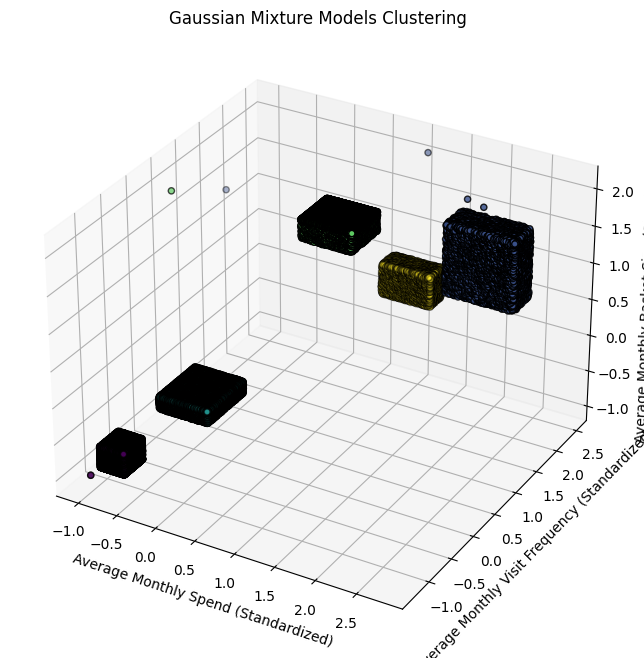

In [6]:
# Gaussian Mixture Models clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data_scaled)
gmm_labels = gmm.predict(data_scaled)

# Plotting the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k')

ax.set_title('Gaussian Mixture Models Clustering')
ax.set_xlabel('Average Monthly Spend (Standardized)')
ax.set_ylabel('Average Monthly Visit Frequency (Standardized)')
ax.set_zlabel('Average Monthly Basket Size (Standardized)')
plt.show()

# DBSCAN

In [7]:
# # DBSCAN clustering
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(data_scaled)

# # Plotting the clusters
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')

# ax.set_title('DBSCAN Clustering')
# ax.set_xlabel('Average Monthly Spend (Standardized)')
# ax.set_ylabel('Average Monthly Visit Frequency (Standardized)')
# ax.set_zlabel('Average Monthly Basket Size (Standardized)')
# plt.show()






